In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio

Ucitavanje fajla

In [ ]:
sample_rate, audio = wavfile.read('/content/drive/MyDrive/PrepoznavanjeGovora/PrviDomaci/Zeljko Obradovic - Aleksa.wav')
samples = len(audio)
print(samples)
Audio('/content/drive/MyDrive/PrepoznavanjeGovora/PrviDomaci/Zeljko Obradovic - Aleksa.wav', autoplay=False)

448610


Prikaz talasnog oblika

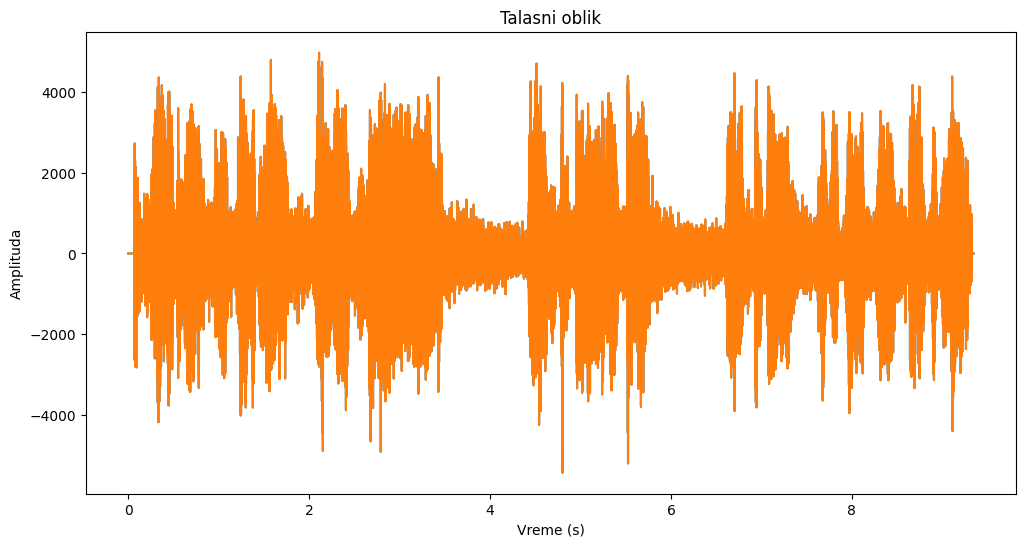

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(samples) / sample_rate, audio)
plt.title('Talasni oblik')
plt.ylabel('Amplituda')
plt.xlabel('Vreme (s)')

plt.show()

Detekcija početka i kraja zvuka

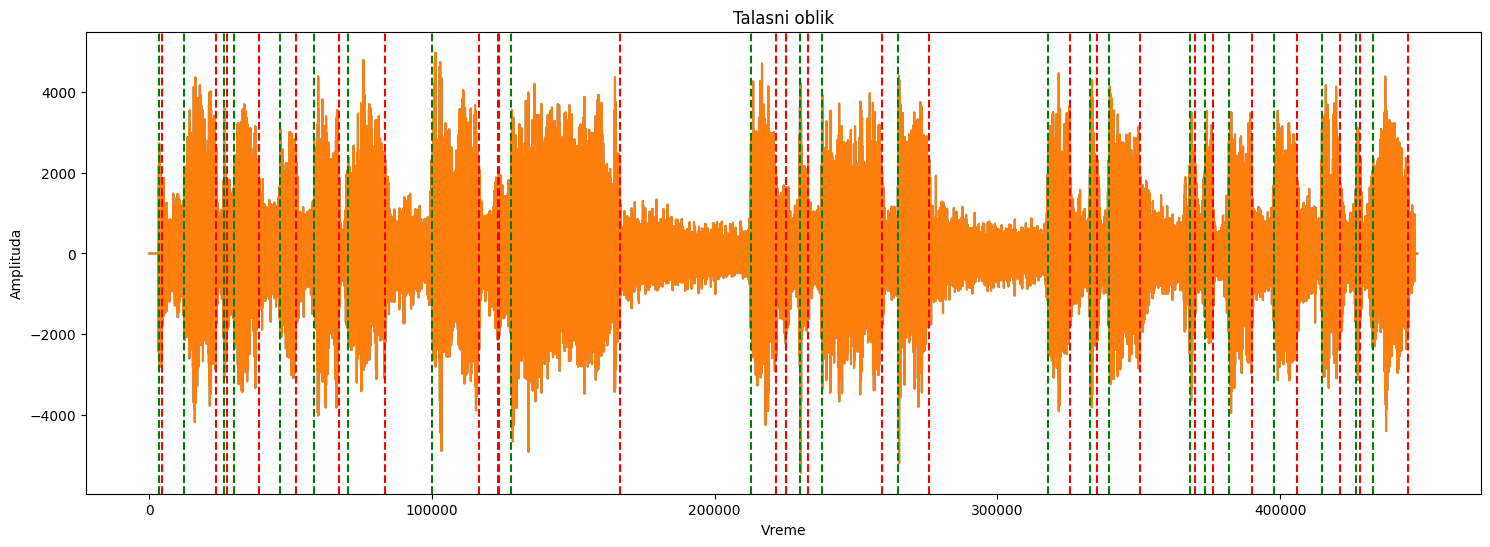

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(audio)
plt.title('Talasni oblik')
plt.ylabel('Amplituda')
plt.xlabel('Vreme')

sounds = []

threshold = 2000
sound_start = 0
sound_end = 2000

sound = False
timer = 0

for i in range(1, samples):
    if np.any(np.abs(audio[i]) >= threshold):
        if not sound:
            sound_start = i
            sound = True
        timer = 0
    else:
        if sound:
            timer += 1
            if timer >= sound_end:
              sounds.append((sound_start, i - (sound_end)))
              sound = False

for start, end in sounds:
    plt.axvline(start, color='g', linestyle='--')
    plt.axvline(end, color='r', linestyle='--')

plt.show()

Prikaz RMS grafa i prosečne amplitude

<ipython-input-6-c81574457e10>:5: RuntimeWarning: invalid value encountered in sqrt
  rms = np.sqrt(np.mean(frame ** 2))


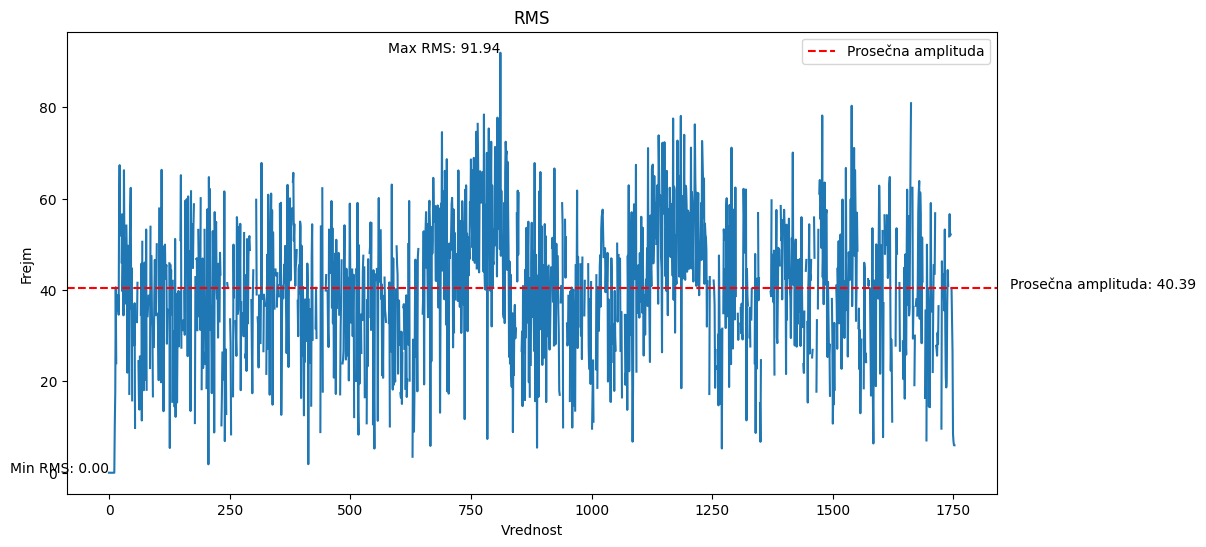

In [ ]:
frame_size = 256
rms_values = []
for i in range(0, samples, frame_size):
    frame = audio[i:i + frame_size]
    rms = np.sqrt(np.mean(frame ** 2))
    rms_values.append(rms)

plt.figure(figsize=(12,6))
plt.plot(rms_values)
plt.title('RMS')
plt.ylabel('Frejm')
plt.xlabel('Vrednost')

min_y = min(rms_values)
max_y = max(rms_values)

min_x = rms_values.index(min_y)
max_x = rms_values.index(max_y)

plt.text(min_x, min_y, f'Min RMS: {min_y:.2f}', fontsize=10, ha='right')
plt.text(max_x, max_y, f'Max RMS: {max_y:.2f}', fontsize=10, ha='right')



average_amplitude = np.nanmean(rms_values)
plt.axhline(average_amplitude, color='r', linestyle='--', label="Prosečna amplituda")
plt.text(len(rms_values) + 500, average_amplitude, f'Prosečna amplituda: {average_amplitude:.2f}', fontsize=10, ha='right')

plt.legend()

plt.show()

Stopa prelaska preko nule

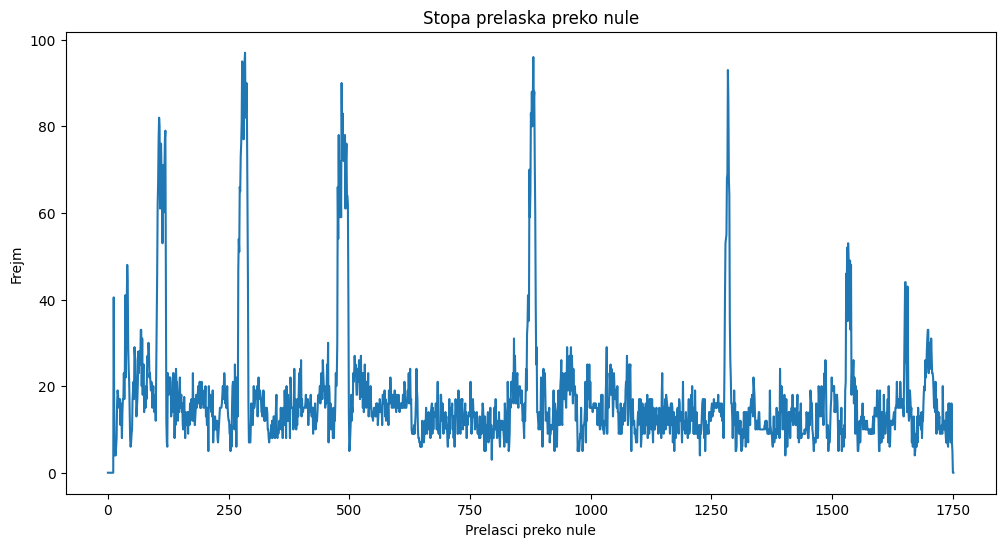

In [ ]:
frame_size = 256

zcr_values = []
for i in range(0, samples - frame_size, frame_size):
    frame = audio[i:i+frame_size]
    zcr = np.sum(np.abs(np.diff(np.sign(frame[:, 0]))) / 2)
    zcr_values.append(zcr)
plt.figure(figsize=(12,6))
plt.plot(zcr_values)
plt.title('Stopa prelaska preko nule')
plt.ylabel('Frejm')
plt.xlabel('Prelasci preko nule')
plt.show()

Prebacivanje iz vremenskog u frekvencijski domen

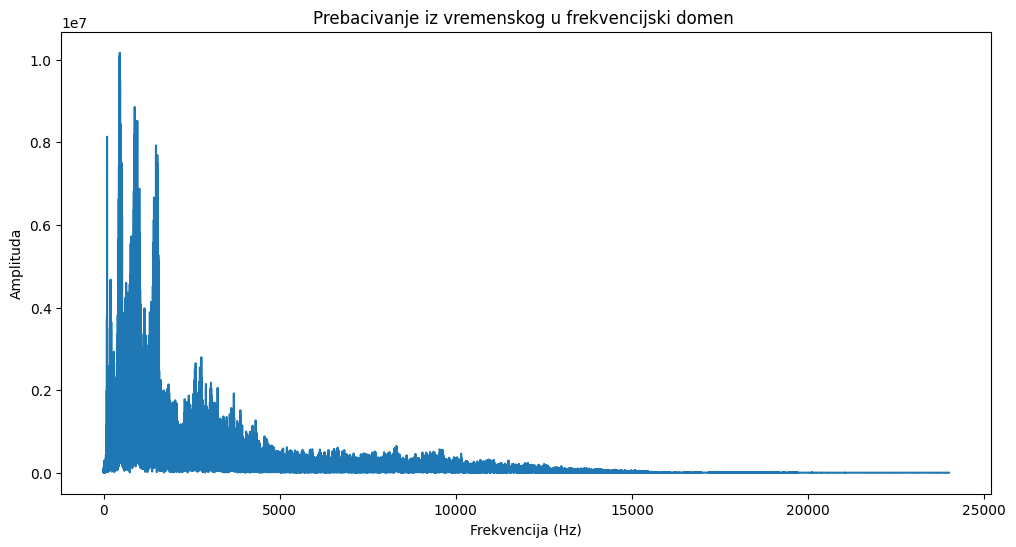

In [ ]:
spectrum = np.fft.fft(audio.mean(axis = 1))
spectrum = spectrum[:samples//2]

frequencies = np.fft.fftfreq(samples, 1/sample_rate)
frequencies = frequencies[:samples//2]

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(spectrum))
plt.title('Prebacivanje iz vremenskog u frekvencijski domen ')
plt.xlabel('Frekvencija (Hz)')
plt.ylabel('Amplituda')
plt.show()


Prikaz spektograma

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


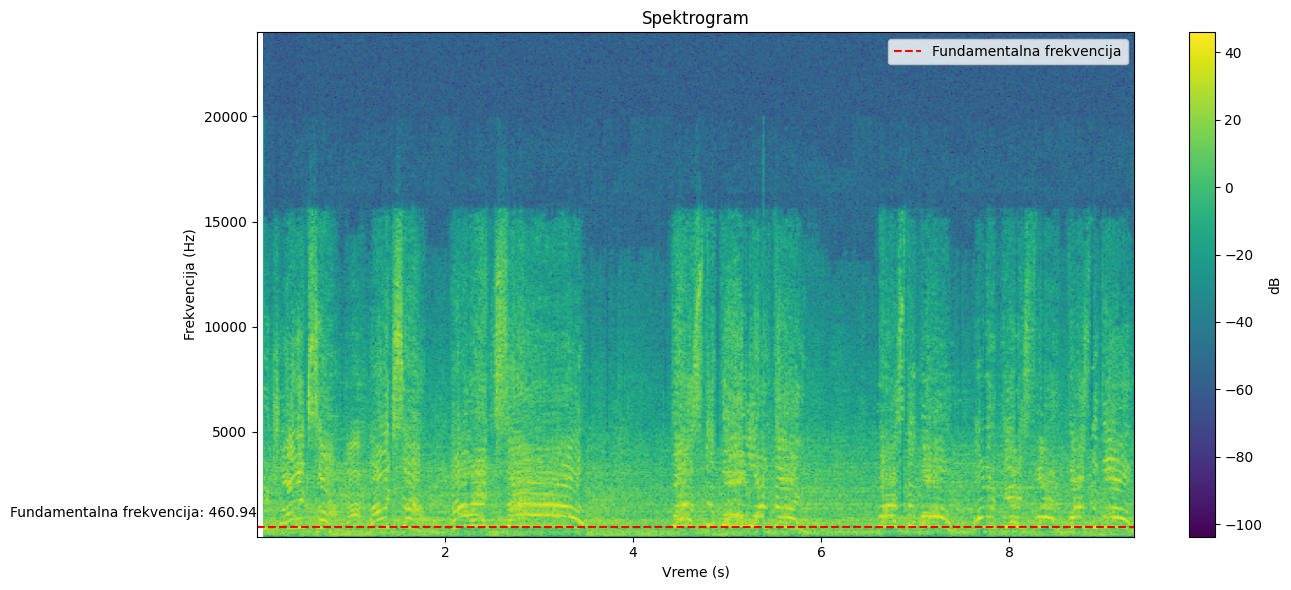

In [ ]:
plt.figure(figsize=(12, 6))

signal = audio.mean(axis=1)
NFFT = 1024
Fs = sample_rate
noverlap = 2

plt.specgram(signal, NFFT, Fs, noverlap, cmap='viridis')

plt.title('Spektrogram')
plt.xlabel('Vreme (s)')
plt.ylabel('Frekvencija (Hz)')
plt.colorbar(label='dB')
plt.tight_layout()

fundamental_frequency = frequencies[np.argmax(np.abs(spectrum))]
plt.axhline(fundamental_frequency, color='r', linestyle='--', label="Fundamentalna frekvencija")
plt.text(0,fundamental_frequency + 500, f'Fundamentalna frekvencija: {fundamental_frequency:.2f}', fontsize=10, ha='right')

plt.legend()

plt.show()
